In [2]:
%autosave 300

Autosaving every 300 seconds


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet

from jupyterthemes import jtplot

jtplot.style()

### load 

In [3]:
folder = 'C:/Users/enowak/OneDrive - Sam Schwartz Engineering/tlc_data/raw/2019/'

ff = 'yellow_tripdata_2019-0{0}.csv'

LOC = 132

In [4]:
dfs = []
for i in range(1, 7):
    print(i, end='\t')
    f = ff.format(i)

    df = pd.read_csv(folder + f)
    df = df[df.PULocationID == LOC]
    
    dfs.append(df)
df = pd.concat(dfs, sort=False)

1	2	3	4	5	6	

In [5]:
df_all = df.copy()

In [6]:
df = df_all.copy()

df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime, infer_datetime_format=True)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime, infer_datetime_format=True)

df = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID']]

df.columns = ['pu', 'du', 'ploc', 'dloc']

df = df[df.ploc == LOC]

df = df[['pu', 'dloc']]

df.columns = ['date_time', 'zone']

df = df[(df.date_time >= '2019-01-01') & (df.date_time < '2019-07-01')]

df = df.resample('24H', on='date_time')[['date_time']].count().interpolate('linear')

df.columns = ['num']

df.reset_index(inplace=True)

In [7]:
print(df.shape)
df.head(2)

(181, 2)


,date_time,num
0,2019-01-01,7475
1,2019-01-02,8145


### forecast

In [42]:
X, y = df.date_time.values, df.num.values

In [43]:
X = X.reshape(-1, 1)

In [44]:
X_train, X_test, y_train, y_test = X[:int(len(X)*.8)], X[int(len(X)*.8):], y[:int(len(y)*.8)], y[int(len(y)*.8):]

In [58]:
from sklearn.svm import NuSVR, SVR

In [60]:
reg = NuSVR()

In [61]:
reg.fit(X_train, y_train)

NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [62]:
pred = reg.predict(X_test)

### visualize

<Figure size 460.8x403.2 with 0 Axes>

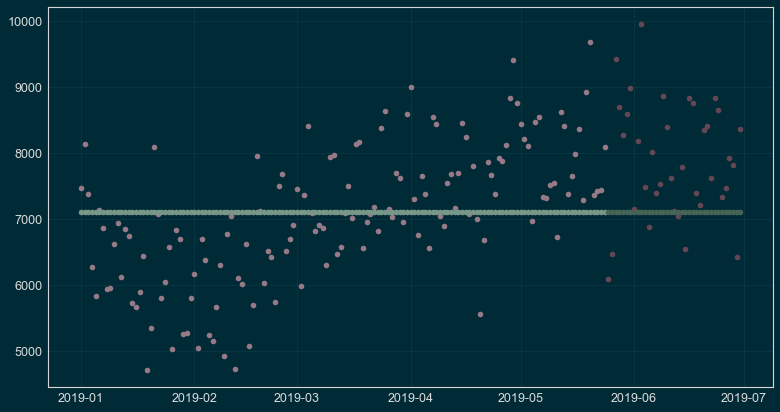

In [63]:
plt.clf()
plt.figure(figsize=(13, 7))

plt.plot_date(X_train, y_train, c='#987987')
plt.plot_date(X_test, y_test, c='#654654')
plt.plot_date(X_train, reg.predict(X_train), c='#789789')
plt.plot_date(X_test, pred, c='#456456')

plt.show()

<Figure size 432x288 with 0 Axes>

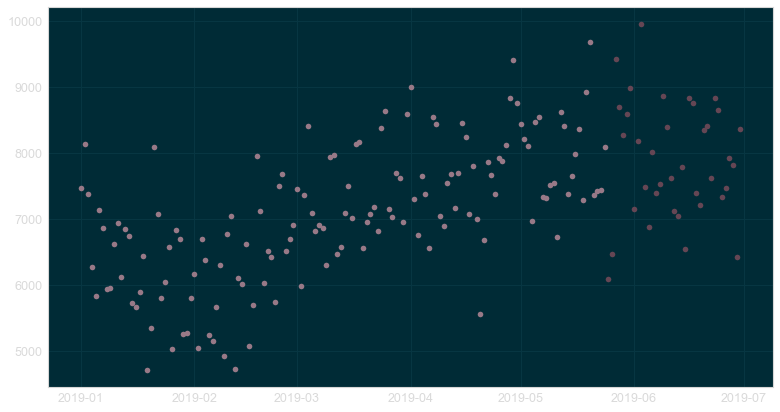

In [56]:
plt.clf()
plt.figure(figsize=(13, 7))

plt.plot_date(X_train, y_train, c='#987987')
plt.plot_date(X_test, y_test, c='#654654')

plt.show()

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
X, y = df[['date_time']].copy(), df['num'].copy()
X_train, X_test = X.iloc[:int(len(X)*.8)], X.iloc[int(len(X)*.8):]
y_train, y_test = y.iloc[:int(len(y)*.8)], y.iloc[int(len(y)*.8):]

reg = RandomForestRegressor()

reg.fit(X_train, y_train)

pred = reg.predict(X_test)

<Figure size 460.8x403.2 with 0 Axes>

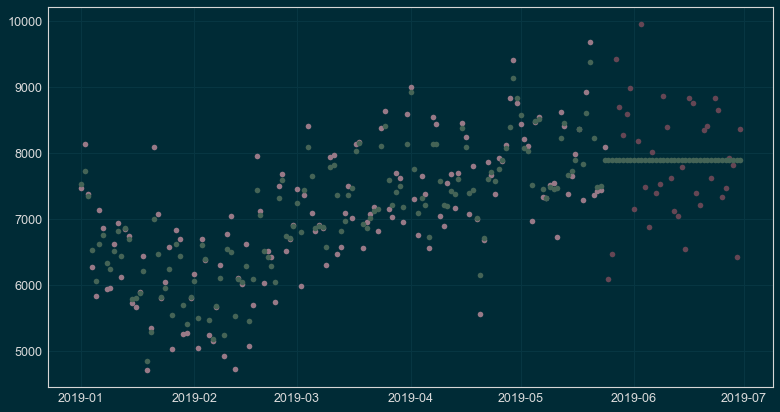

In [76]:
plt.clf()
plt.figure(figsize=(13, 7))

plt.plot_date(X_train, y_train, c='#987987')
plt.plot_date(X_test, y_test, c='#654654')
plt.plot_date(X_train, reg.predict(X_train), c='#456456')
plt.plot_date(X_test, pred, c='#456456')

plt.show()

In [88]:
from fbprophet import Prophet

In [79]:
d = df.copy()

In [91]:
d.columns = ['ds', 'y']

In [98]:
m = Prophet()

In [99]:
m.fit(d)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [100]:
future = m.make_future_dataframe(periods=30)

In [101]:
forecast = m.predict(future)

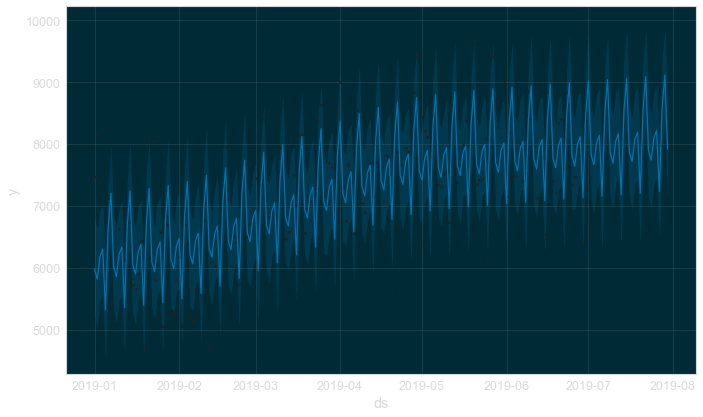

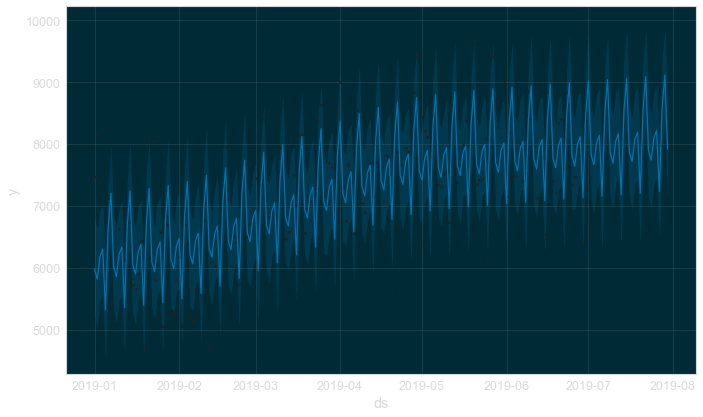

In [102]:
m.plot(forecast)